Importing Required Libraries for the project

In [149]:
import warnings
warnings.simplefilter("ignore")
warnings.filterwarnings("ignore")
import joblib

import pandas as pd
import numpy as np
import seaborn as sns
import missingno
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.stats import zscore

from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import LabelEncoder,OrdinalEncoder,StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from xgboost import XGBRegressor
import xgboost as xgb
import lightgbm as lgb

from sklearn import decomposition
from sklearn.decomposition import PCA
from sklearn import metrics
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score,accuracy_score
from sklearn.model_selection import train_test_split,GridSearchCV,cross_val_score
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,roc_auc_score,f1_score,roc_curve,auc

read the csv file to covert it into dataframe using pandas

In [17]:
df = pd.read_csv(r"avocado.csv")
df.head(20)

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany
5,5,2015-11-22,1.26,55979.78,1184.27,48067.99,43.61,6683.91,6556.47,127.44,0.0,conventional,2015,Albany
6,6,2015-11-15,0.99,83453.76,1368.92,73672.72,93.26,8318.86,8196.81,122.05,0.0,conventional,2015,Albany
7,7,2015-11-08,0.98,109428.33,703.75,101815.36,80.00,6829.22,6266.85,562.37,0.0,conventional,2015,Albany
8,8,2015-11-01,1.02,99811.42,1022.15,87315.57,85.34,11388.36,11104.53,283.83,0.0,conventional,2015,Albany
9,9,2015-10-25,1.07,74338.76,842.40,64757.44,113.00,8625.92,8061.47,564.45,0.0,conventional,2015,Albany


All the relevant columns in the dataset:

    Date - The date of the observation

    Average Price - The average price of a single avocado

    Type - Whether it is conventional or organic

    Year - The year information

    Region - The city or region of the observation

    Total Volume - Total number of avocados sold

    4046 - Total number of avocados with PLU 4046 sold

    4225 - Total number of avocados with PLU 4225 sold

    4770 - Total number of avocados with PLU 4770 sold

# Data Analysis

In [3]:
df.isnull().sum()

Unnamed: 0      0
Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64

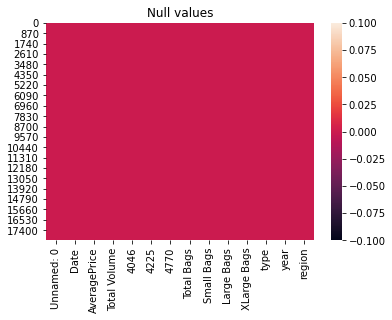

In [4]:
sns.heatmap(df.isnull())
plt.title('Null values')
plt.show()

In [5]:
#Checking dataset features and types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    18249 non-null  int64  
 1   Date          18249 non-null  object 
 2   AveragePrice  18249 non-null  float64
 3   Total Volume  18249 non-null  float64
 4   4046          18249 non-null  float64
 5   4225          18249 non-null  float64
 6   4770          18249 non-null  float64
 7   Total Bags    18249 non-null  float64
 8   Small Bags    18249 non-null  float64
 9   Large Bags    18249 non-null  float64
 10  XLarge Bags   18249 non-null  float64
 11  type          18249 non-null  object 
 12  year          18249 non-null  int64  
 13  region        18249 non-null  object 
dtypes: float64(9), int64(2), object(3)
memory usage: 1.9+ MB


there are 10 numerical features and 3 categorical features

-we gotta simplify the date column for better understanding

-there isn't any null value.

In [18]:
#seperate the values of date in 3 diffrent columns consisting day, month, year
df['Year'], df['Month'], df['Day'] = df['Date'].str.split('-').str

#droping the Date and year column because there not of any further use.
df.drop(columns=['Date','year'], inplace=True)

#printing the dataframe after altering it.
df.tail(10)

,Unnamed: 0,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,region,Year,Month,Day
18239,2,1.56,22128.42,2162.67,3194.25,8.93,16762.57,16510.32,252.25,0.0,organic,WestTexNewMexico,2018,03,11
18240,3,1.54,17393.30,1832.24,1905.57,0.00,13655.49,13401.93,253.56,0.0,organic,WestTexNewMexico,2018,03,04
18241,4,1.57,18421.24,1974.26,2482.65,0.00,13964.33,13698.27,266.06,0.0,organic,WestTexNewMexico,2018,02,25
18242,5,1.56,17597.12,1892.05,1928.36,0.00,13776.71,13553.53,223.18,0.0,organic,WestTexNewMexico,2018,02,18
18243,6,1.57,15986.17,1924.28,1368.32,0.00,12693.57,12437.35,256.22,0.0,organic,WestTexNewMexico,2018,02,11
18244,7,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,WestTexNewMexico,2018,02,04
18245,8,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,WestTexNewMexico,2018,01,28
18246,9,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,WestTexNewMexico,2018,01,21
18247,10,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,WestTexNewMexico,2018,01,14
18248,11,1.62,17489.58,2894.77,2356.13,224.53,12014.15,11988.14,26.01,0.0,organic,WestTexNewMexico,2018,01,07


In [19]:
#Checking dimesions
df.shape


(18249, 15)

total 18249 rows and 15 columns

In [20]:
#deleting unnamed: 0
df.drop("Unnamed: 0", axis=1, inplace=True) #updated the dataset

droping the 'unnamed: 0' column from dataset, it's hardly of any use except indexing.

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
AveragePrice,18249.0,1.405978,4.026766e-01,0.44,1.10,1.37,1.66,3.25
Total Volume,18249.0,850644.013009,3.453545e+06,84.56,10838.58,107376.76,432962.29,62505646.52
4046,18249.0,293008.424531,1.264989e+06,0.00,854.07,8645.30,111020.20,22743616.17
4225,18249.0,295154.568356,1.204120e+06,0.00,3008.78,29061.02,150206.86,20470572.61
4770,18249.0,22839.735993,1.074641e+05,0.00,0.00,184.99,6243.42,2546439.11
Total Bags,18249.0,239639.202060,9.862424e+05,0.00,5088.64,39743.83,110783.37,19373134.37
Small Bags,18249.0,182194.686696,7.461785e+05,0.00,2849.42,26362.82,83337.67,13384586.80
Large Bags,18249.0,54338.088145,2.439660e+05,0.00,127.47,2647.71,22029.25,5719096.61
XLarge Bags,18249.0,3106.426507,1.769289e+04,0.00,0.00,0.00,132.50,551693.65


we do have zeros in 4046, 4225, 4770, total bags, large bags, xlarge bags. we can't assume that it's a null value because it's quantity, it may have zero availabilty in it.

In [7]:
#unique values in columns
df.nunique()

AveragePrice      259
Total Volume    18237
4046            17702
4225            18103
4770            12071
Total Bags      18097
Small Bags      17321
Large Bags      15082
XLarge Bags      5588
type                2
region             54
Year                4
Month              12
Day                31
dtype: int64

- this is the data of 4 years in total
- 2 types of value there in'type' column i.e. Coventional and organic

In [8]:
df.head()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,region,Year,Month,Day
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,Albany,2015,12,27
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,Albany,2015,12,20
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,Albany,2015,12,13
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,Albany,2015,12,06
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,Albany,2015,11,29


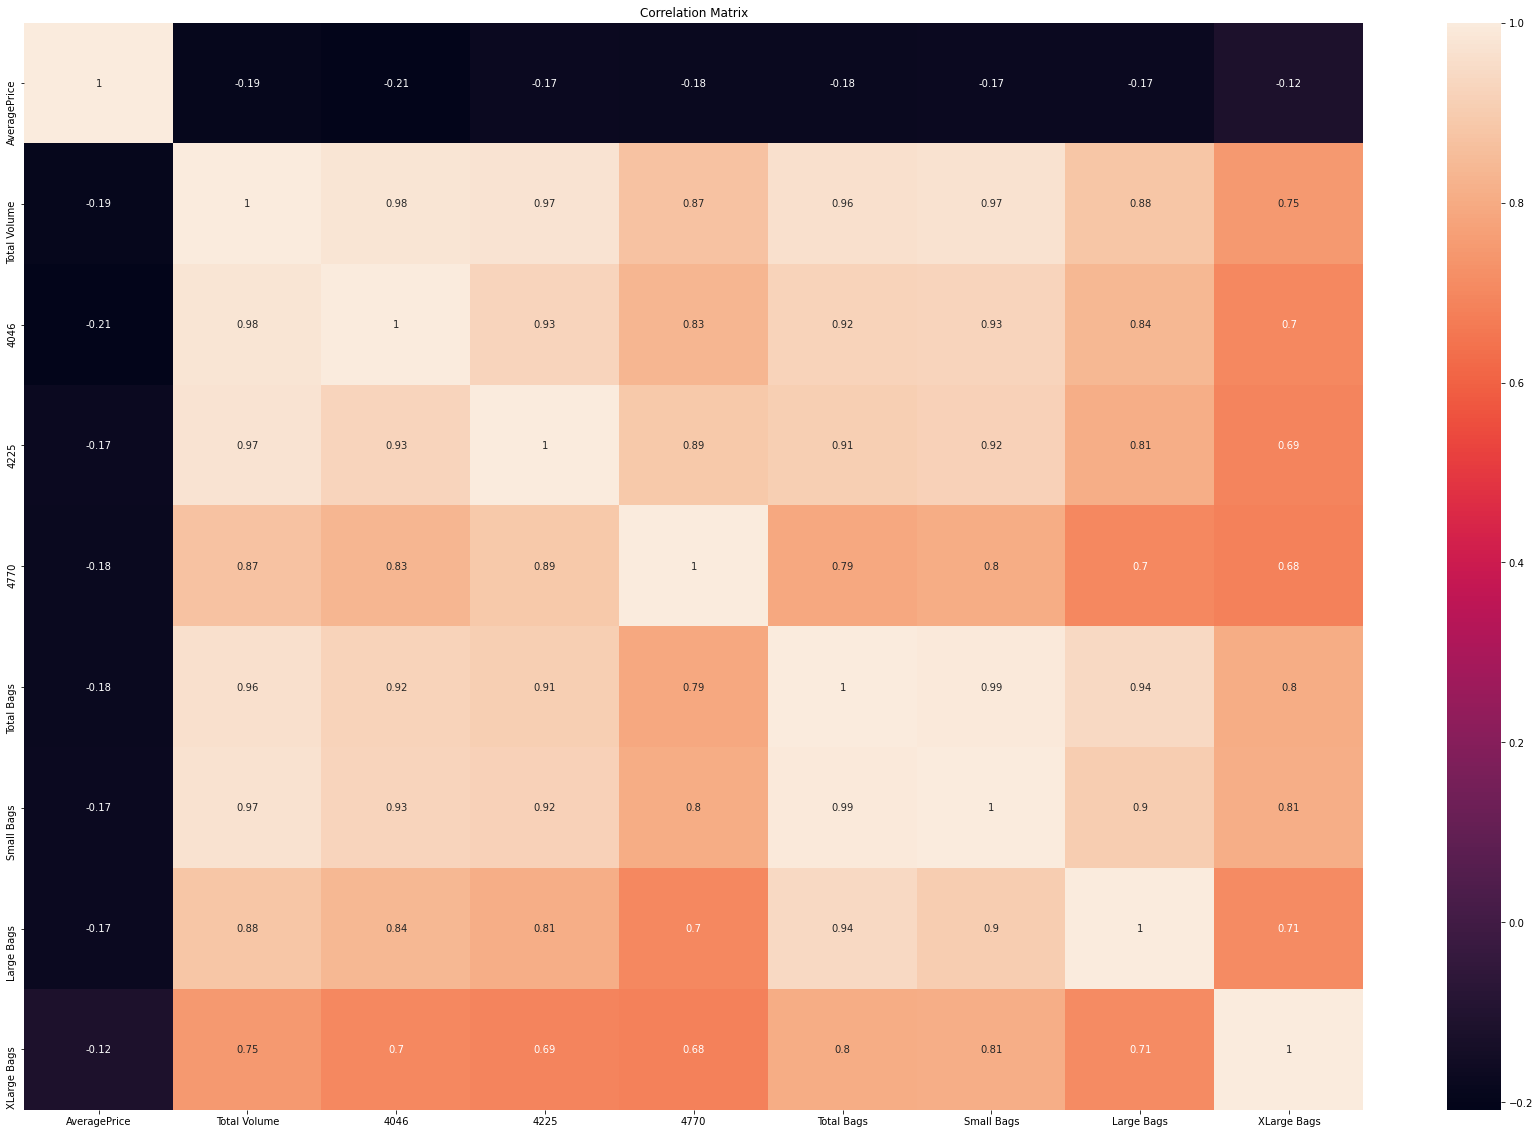

In [12]:
corr_mat=df.corr()
#size of the canvas
plt.figure(figsize=[30,20])
#plot the correlation matrix
sns.heatmap(corr_mat,annot=True)
plt.title('Correlation Matrix')
plt.show()

we can see
- 4046 is affecting a lot to Xlarge bags, large bags, small bags, 4770 and 4225

- maximum number of small bags were sold. we can relate with total bags

- maximum number of total volume is 4046.

- some are negatively corelated.

In [9]:
object_datatype = []
for x in df.dtypes.index:
    if df.dtypes[x] == 'O':
        object_datatype.append(x)
object_datatype

['type', 'region', 'Year', 'Month', 'Day']

# Data Visualization

- Univariate Analysis

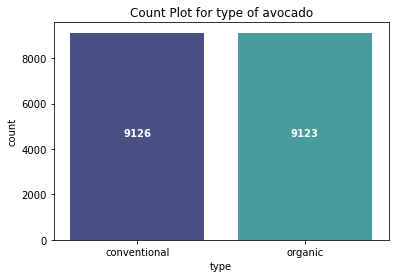

In [39]:
#Checking feature type using countplot
ax = sns.countplot(df['type'], palette="mako")
val = df['type'].value_counts()
k=0
for i in ax.get_xticklabels():
    ax.text(k,val[i.get_text()]/2,val[i.get_text()],fontweight='bold',horizontalalignment='center',color='w')
    k+=1
    
plt.title(f"Count Plot for type of avocado")
plt.show()

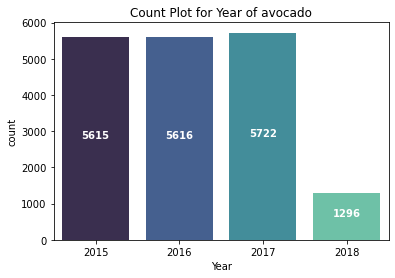

In [40]:
#Checking feature 'Year' using countplot
ax = sns.countplot(df['Year'], palette="mako")
val = df['Year'].value_counts()
k=0
for i in ax.get_xticklabels():
    ax.text(k,val[i.get_text()]/2,val[i.get_text()],fontweight='bold',horizontalalignment='center',color='w')
    k+=1
    
plt.title(f"Count Plot for Year of avocado")
plt.show()

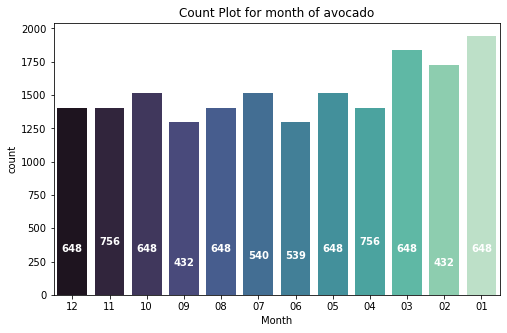

In [70]:
#Checking feature month using countplot
plt.figure(figsize=(8,5))
ax=sns.countplot(x='Month', data=df, palette="mako")
k=0
for i in ax.get_xticklabels():
    ax.text(k,val[i.get_text()]/2,val[i.get_text()],fontweight='bold',horizontalalignment='center',color='w')
    k+=1 
plt.title(f"Count Plot for month of avocado")
plt.show()

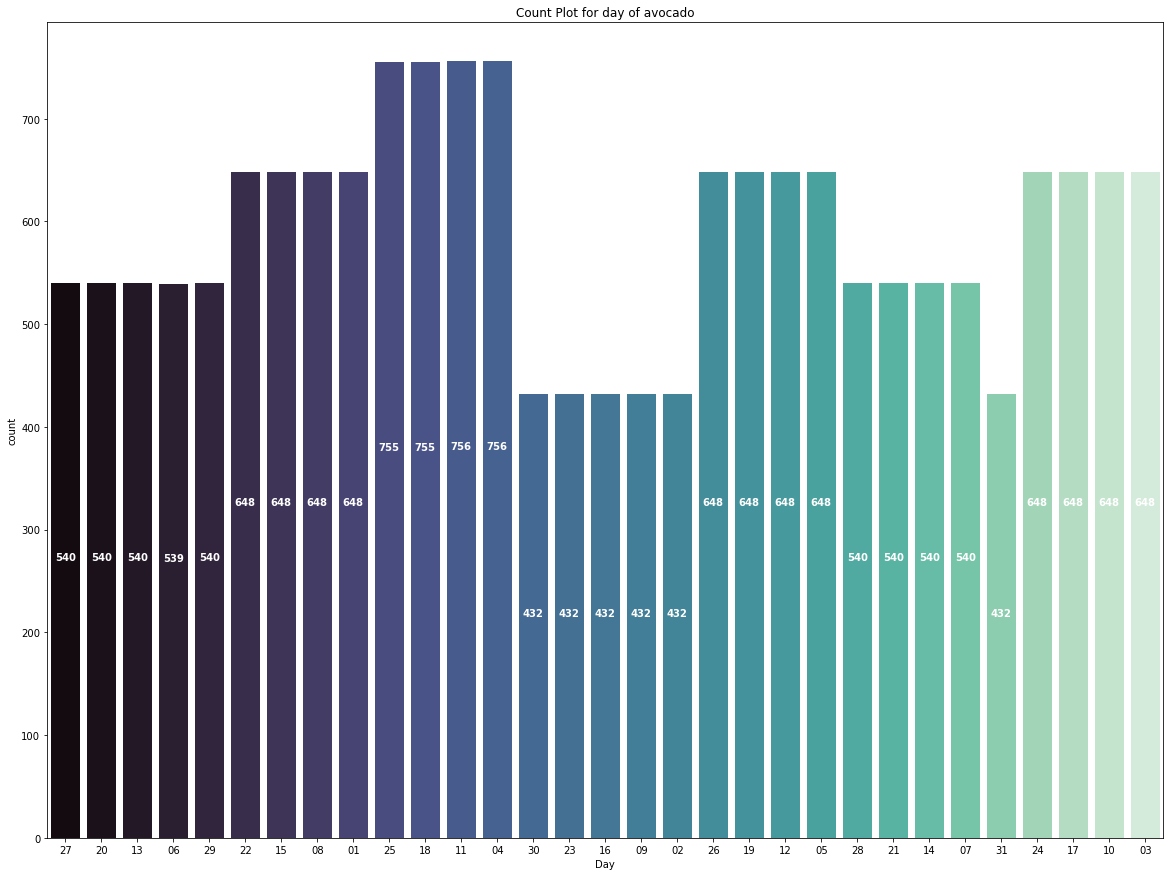

In [100]:
#Checking feature day using countplot
plt.figure(figsize=(20,15))
ax=sns.countplot(x='Day', data=df, palette="mako")
k=0
for i in ax.get_xticklabels():
    ax.text(k,val[i.get_text()]/2,val[i.get_text()],fontweight='bold',horizontalalignment='center',color='w')
    k+=1 
plt.title(f"Count Plot for day of avocado")
plt.show()

In [84]:
#Checking feature day
print(df['region'].value_counts())

LosAngeles             338
HarrisburgScranton     338
Louisville             338
BaltimoreWashington    338
Plains                 338
Syracuse               338
Southeast              338
Northeast              338
GreatLakes             338
Pittsburgh             338
Tampa                  338
SouthCarolina          338
Indianapolis           338
MiamiFtLauderdale      338
NewYork                338
Seattle                338
SanFrancisco           338
Atlanta                338
DallasFtWorth          338
StLouis                338
Houston                338
Charlotte              338
BuffaloRochester       338
Nashville              338
RaleighGreensboro      338
Portland               338
Boise                  338
TotalUS                338
Jacksonville           338
GrandRapids            338
Spokane                338
Philadelphia           338
Albany                 338
RichmondNorfolk        338
Boston                 338
Midsouth               338
Columbus               338
H

every city got equal value except westexnewmexico so, i didn't used any plots, because it's of no use

- Bivariate Analysis

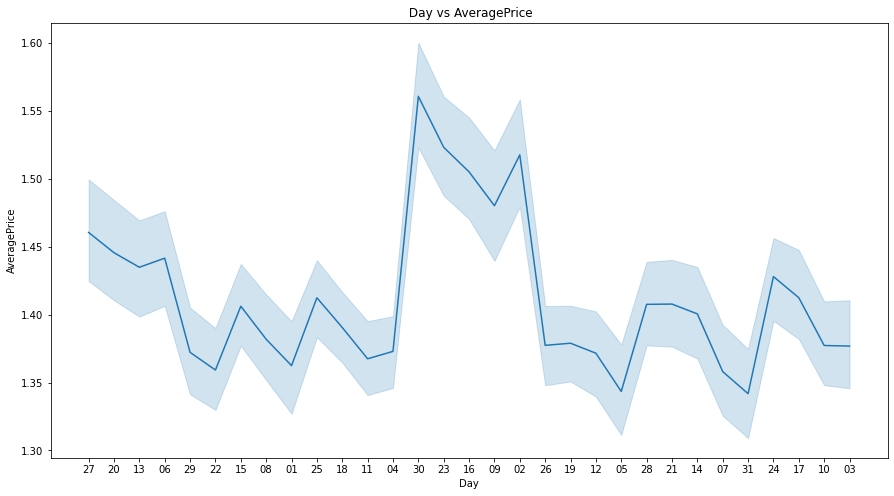

In [28]:
#Checking relationship between Date & Average Price using lineplot
x='Day'
y='AveragePrice'
plt.figure(figsize=(15,8))
sns.lineplot(df[x],y,data=df)
plt.title(f" {x} vs {y}")
plt.show()

- we can see the highest is on month end.
- lowest is on first week.


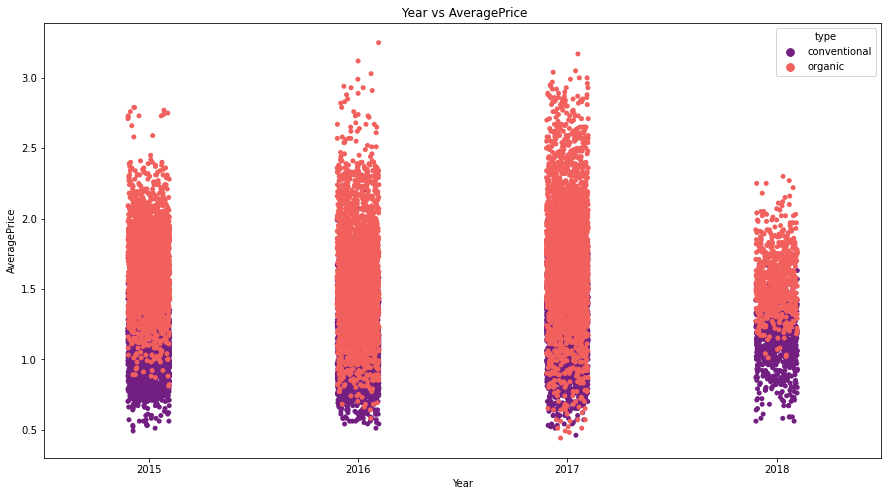

In [38]:
x='Year'
y='AveragePrice'
plt.figure(figsize=(15,8))
sns.stripplot(x,y,hue="type", data=df, palette="magma")
plt.title(f" {x} vs {y}")
plt.show()

here we can see how it got sold off i perticular year, and how much they price, which one has higher worth and which one has lowest. it's clearly visible.

In [ ]:
#Lets see what is the average price af avocado in every month
sns.barplot(x="Month", y="AveragePrice", data=df)

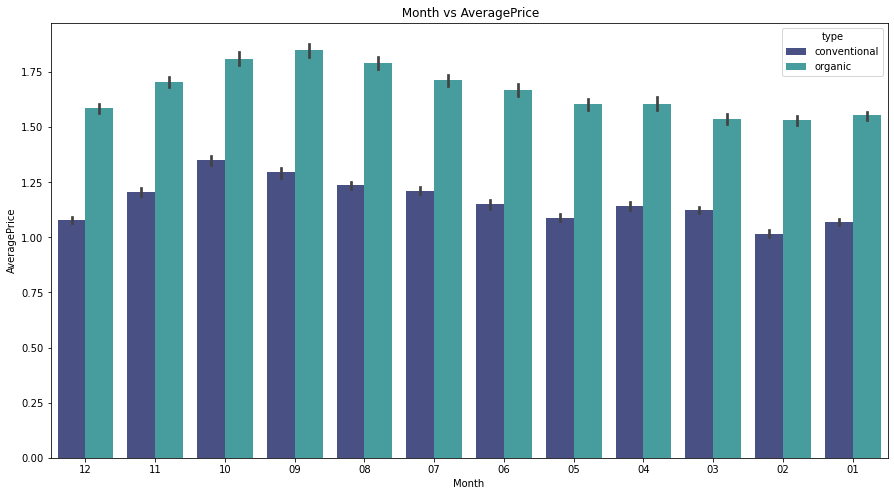

In [41]:
x="Month"
y="AveragePrice"
plt.figure(figsize=(15,8))
sns.barplot(x,y,hue="type", data=df, palette="mako")
plt.title(f" {x} vs {y}")
plt.show()

highest average price was on september and october

In [48]:
#Checking relationship between Small Bags and Average Price using scatter plot
x=['Small Bags','Large Bags','XLarge Bags']
for i in df[x]:
    sns.scatterplot(x,'Total Bags',data=df)
    plt.title(f'Scatter Plot: {x} vs {y}')
    plt.show()

ValueError: Length of list vectors must match length of `data` when both are used, but `data` has length 18249 and the vector passed to `x` has length 3.

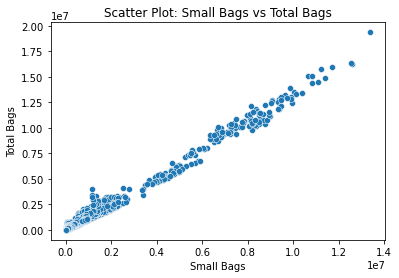

In [60]:
#Checking relationship between Small Bags and total bags using scatter plot
sns.scatterplot('Small Bags','Total Bags',data=df)
plt.title(f'Scatter Plot: {x} vs {y}')
plt.show()

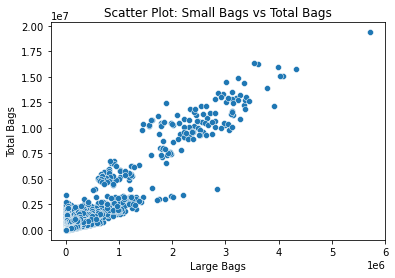

In [61]:
#Checking relationship between Large Bags and total bags using scatter plot
sns.scatterplot('Large Bags','Total Bags',data=df)
plt.title(f'Scatter Plot: {x} vs {y}')
plt.show()

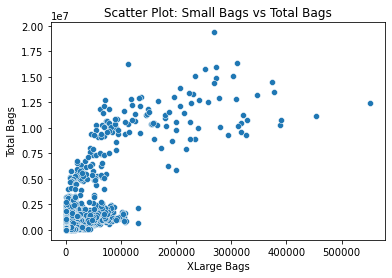

In [62]:
#Checking relationship between XLarge Bags and total bags using scatter plot
sns.scatterplot('XLarge Bags','Total Bags',data=df)
plt.title(f'Scatter Plot: {x} vs {y}')
plt.show()

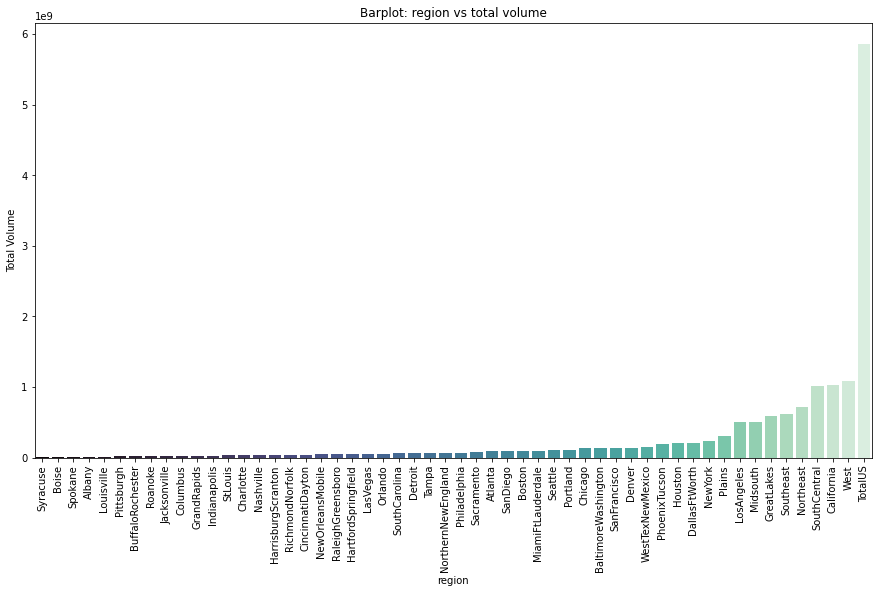

In [83]:
#Checking relationship between region and total volume using scatter plot
reg = df.groupby('region')['Total Volume'].sum().sort_values(ascending=True).reset_index()
plt.figure(figsize=(15,8))
sns.barplot(x=reg["region"], y=reg["Total Volume"], data=df, palette="mako")
plt.title(f'Barplot: region vs total volume')
plt.xticks(rotation=90)
plt.show()

In [59]:
df.head(20)

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,region,Year,Month,Day
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,Albany,2015,12,27
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,Albany,2015,12,20
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,Albany,2015,12,13
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,Albany,2015,12,06
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,Albany,2015,11,29
5,1.26,55979.78,1184.27,48067.99,43.61,6683.91,6556.47,127.44,0.0,conventional,Albany,2015,11,22
6,0.99,83453.76,1368.92,73672.72,93.26,8318.86,8196.81,122.05,0.0,conventional,Albany,2015,11,15
7,0.98,109428.33,703.75,101815.36,80.00,6829.22,6266.85,562.37,0.0,conventional,Albany,2015,11,08
8,1.02,99811.42,1022.15,87315.57,85.34,11388.36,11104.53,283.83,0.0,conventional,Albany,2015,11,01
9,1.07,74338.76,842.40,64757.44,113.00,8625.92,8061.47,564.45,0.0,conventional,Albany,2015,10,25


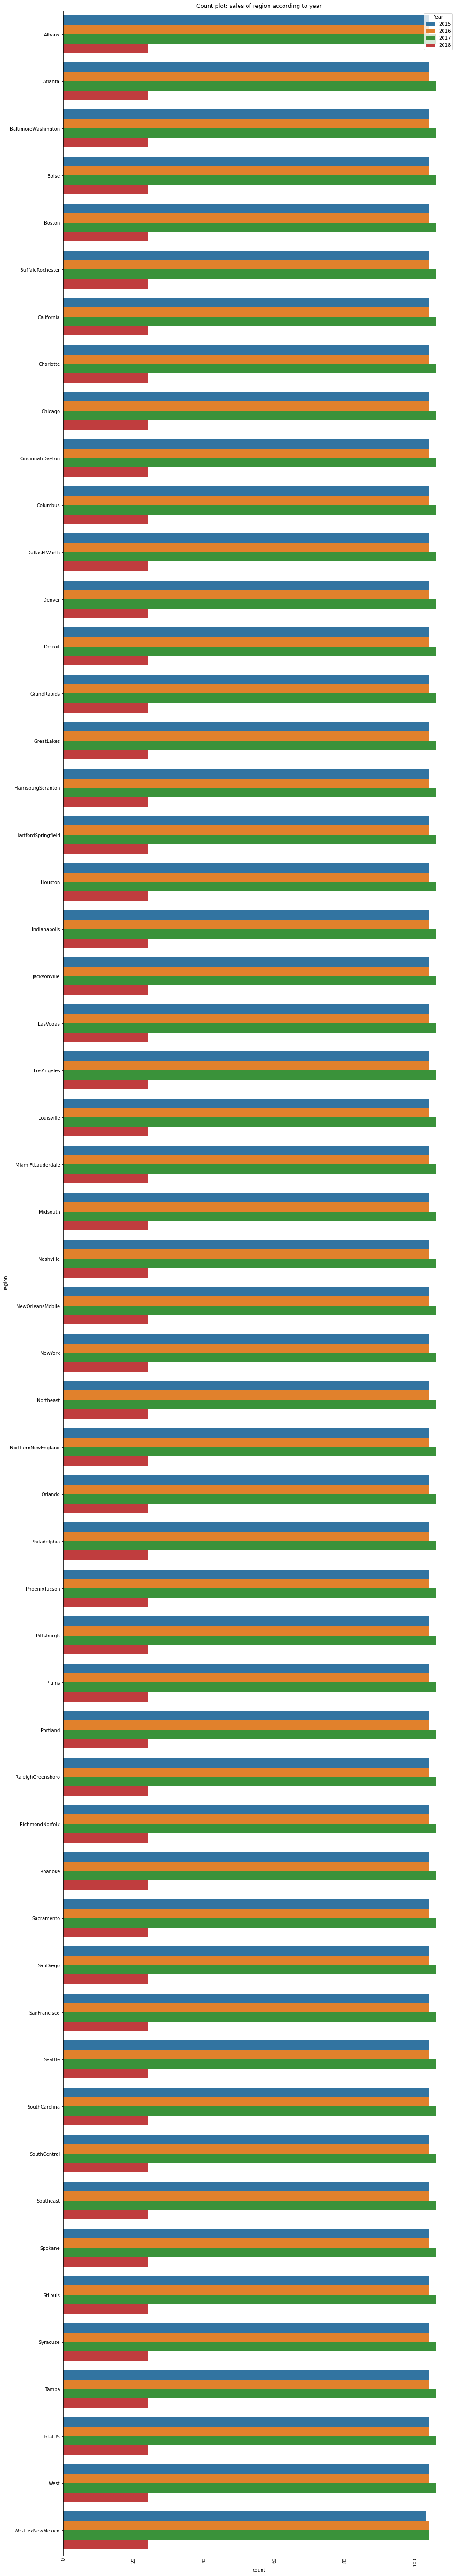

In [92]:
#Checking relationship between Year and Region using countplot
plt.figure(figsize=(15,100))
sns.countplot(y='region',hue='Year',data=df)
plt.title(f'Count plot: sales of region according to year')
plt.xticks(rotation=90)
plt.show()

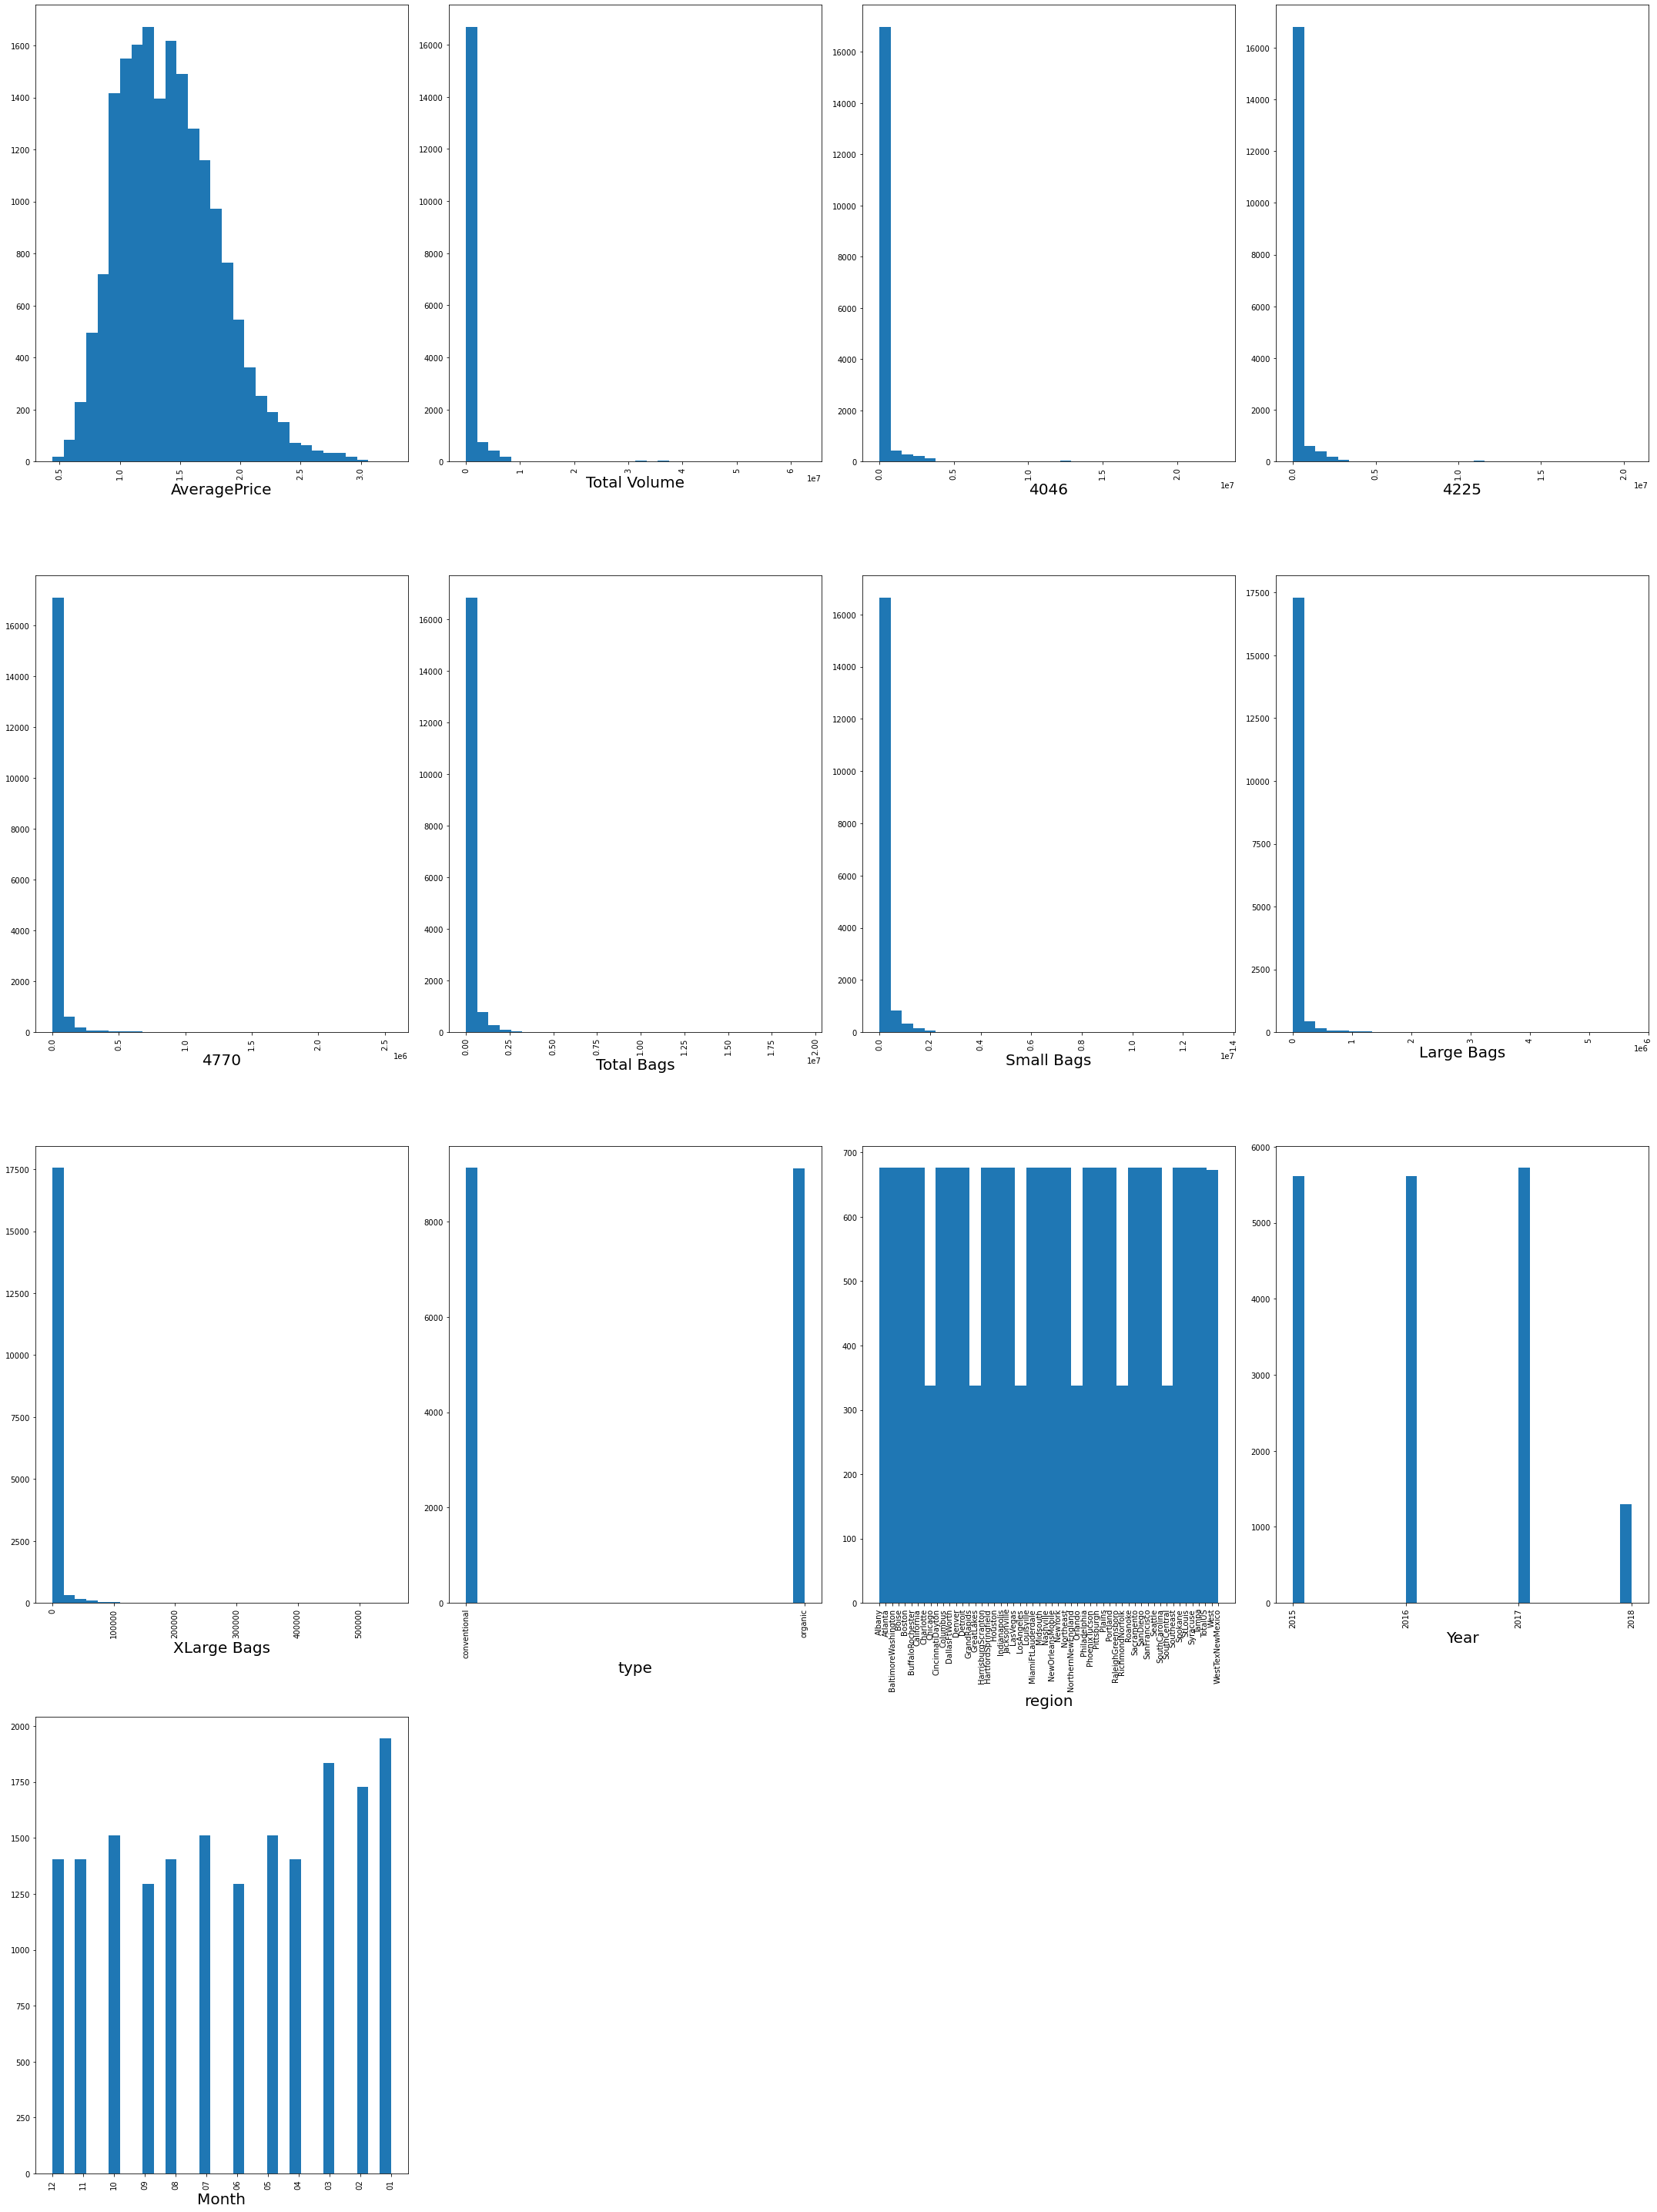

In [123]:
#dispention of continuous parameters
plt.figure(figsize = (30,40))
ref=1
for col in df:
    if ref <=13:
        ax = plt.subplot(4,4,ref)
        plt.xticks(rotation=90)
        plt.xlabel(col,fontsize = 20)
        plt.hist(df[col], bins=30)
    ref+=1
plt.tight_layout()

only averageprice column has a normal distribution other than it all of them are distributed unevenly.

In [23]:
#Encoding categorical variables.
from sklearn.preprocessing import LabelEncoder
le = {}
encoded_value = {}
for i in df.columns:
    if df[i].dtype == object:
        le[i] = LabelEncoder()
        encoded_value[i] = le[i].fit_transform(df[i])
#altering encoded values
data = df.copy()
for i in le.keys():
    data[i] = encoded_value[i]
    
data.head()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,region,Year,Month,Day
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,0,0,0,11,26
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,0,0,0,11,19
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,0,0,0,11,12
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,0,0,0,11,5
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,0,0,0,10,28


# Skewnes

In [27]:
#Checking skewness of data
data.skew()

AveragePrice     0.580303
Total Volume     9.007687
4046             8.648220
4225             8.942466
4770            10.159396
Total Bags       9.756072
Small Bags       9.540660
Large Bags       9.796455
XLarge Bags     13.139751
type             0.000329
region           0.000030
Year             0.215339
Month            0.106617
Day              0.014310
dtype: float64

In [32]:
riv=data.select_dtypes(exclude='object')
for i in riv:
    if data[i].skew()>0.55:
        data[i]=np.log1p(data[i])

In [33]:
data.skew()

AveragePrice    0.138629
Total Volume    0.088098
4046           -0.328195
4225           -0.486654
4770            0.099986
Total Bags     -0.218874
Small Bags     -0.622148
Large Bags     -0.547765
XLarge Bags     1.176494
type            0.000329
region          0.000030
Year            0.215339
Month           0.106617
Day             0.014310
dtype: float64

In [35]:
#using label encoder
le=LabelEncoder()
data['region']=le.fit_transform(data['region'])

In [38]:
#spliting the data in 2
X=data.drop(['AveragePrice','type'],axis=1)
Y=data[['AveragePrice']]

In [41]:
#scaling it
scale=StandardScaler()
X_scale=scale.fit_transform(X)
X=pd.DataFrame(X_scale,columns=X.columns)
x

,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,region,Year,Month,Day
0,11.070344,6.944801,10.905146,3.895080,9.070833,9.060055,4.545951,0.0,0,0,11,26
1,10.912867,6.515127,10.706381,4.083115,9.159737,9.149429,4.589955,0.0,0,0,11,19
2,11.680313,6.679222,11.600485,4.879007,9.005325,8.992584,4.645736,0.0,0,0,11,12
3,11.277116,7.032624,11.184108,4.298373,8.667708,8.644425,4.903495,0.0,0,0,11,5
4,10.840377,6.848515,10.688288,4.340944,8.729874,8.697389,5.291746,0.0,0,0,10,28
...,...,...,...,...,...,...,...,...,...,...,...,...
18244,9.745419,7.624599,7.333154,0.000000,9.510421,9.477908,6.070391,0.0,53,3,1,3
18245,9.538855,7.083975,8.141044,0.000000,9.134090,9.098407,5.786284,0.0,53,3,0,27
18246,9.530085,7.084159,7.805389,6.591591,9.147945,9.143431,3.768384,0.0,53,3,0,20
18247,9.693150,7.332127,8.000363,6.590315,9.302969,9.298401,3.931826,0.0,53,3,0,13


In [45]:
#etr
extra=ExtraTreesRegressor()
extra.fit(X,Y)
print(extra.feature_importances_)

[0.14798743 0.15399527 0.08598347 0.08856944 0.0996904  0.05792769
 0.08152716 0.02974425 0.06697909 0.08219884 0.0932862  0.01211076]


# Preparing Data for Model

In [130]:
#Lets find best random state using KNeighborsRegressor
from sklearn.neighbors import KNeighborsRegressor
max_r_score=0
r_state = 0
for i in range(0,100):
    x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.30,random_state = r_state)
    kn = KNeighborsRegressor()
    kn.fit(x_train,y_train)
    y_pred = kn.predict(x_test)
    r2_scr = r2_score(y_test,y_pred)
    if r2_scr > max_r_score:
        max_r_score = r2_scr
        r_state = i
print("max r2 score is",max_r_score,"on Random State",r_state)

max r2 score is 0.7930965097014769 on Random State 0


r2 score is 79% and our randome state is 43

In [137]:
# Regression Model Function

def reg(clf, X, Y):
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=0)
    
    # model training
    model.fit(X_train, Y_train)
    
    # Predicting X_test
    pred = clf.predict(X_test)
    
    # RMSE
    rmse = mean_squared_error(Y_test, pred)
    print(" Root mean square error is:", rmse)
    
    # R2 score
    r2 = r2_score(Y_test, pred)*100
    print("Coefficient of determination is:", r2)
    
    # Cross Validation
    cv_score = (cross_val_score(clf, X, Y).mean())*100
    print("Cross Validation Score:", cv_score)
    
    # Result of r2 score minus cv score
    result = r2 - cv_score
    print("Coefficient of determination Score - Cross Validation Score is", result)
    
    # Accuracy
    print('Test Accuracy',clf.score(x_test,y_test)*100)

In [138]:
# Linear Regression Model

model=LinearRegression()
reg(model, X, Y)

 Root mean square error is: 0.013542834604142504
Coefficient of determination is: 49.25279692876852
Cross Validation Score: 1.1123263980991638
Coefficient of determination Score - Cross Validation Score is 48.140470530669354
Test Accuracy 49.22877770158164


In [139]:
model=Ridge()
reg(model, X, Y)

 Root mean square error is: 0.013543168438677368
Coefficient of determination is: 49.251545996491174
Cross Validation Score: 1.114316748859272
Coefficient of determination Score - Cross Validation Score is 48.1372292476319
Test Accuracy 49.22765632553866


In [140]:
# Lasso Regression

model=Lasso()
reg(model, X, Y)

 Root mean square error is: 0.026732188065173596
Coefficient of determination is: -0.1698548298567637
Cross Validation Score: -103.77105535400972
Coefficient of determination Score - Cross Validation Score is 103.60120052415296
Test Accuracy -0.08542597592351431


In [141]:
# Support Vector Regression

model=SVR()
reg(model, X, Y)

 Root mean square error is: 0.006204684750717401
Coefficient of determination is: 76.75003747433227
Cross Validation Score: 2.2569297256002674
Coefficient of determination Score - Cross Validation Score is 74.493107748732
Test Accuracy 77.33095502478939


In [142]:
# Decision Tree Regressor

model=DecisionTreeRegressor()
reg(model, X, Y)

 Root mean square error is: 0.006409140038456066
Coefficient of determination is: 75.98391027060143
Cross Validation Score: -53.52554003069695
Coefficient of determination Score - Cross Validation Score is 129.5094503012984
Test Accuracy 80.1601955340146


In [143]:
# Random Forest Regressor

model=RandomForestRegressor()
reg(model, X, Y)


 Root mean square error is: 0.003020976633870375
Coefficient of determination is: 88.67990939905803
Cross Validation Score: 7.142752845490477
Coefficient of determination Score - Cross Validation Score is 81.53715655356756
Test Accuracy 90.37441944297899


In [144]:
# Ada Boost Regressor

model=AdaBoostRegressor()
reg(model, X, Y)

 Root mean square error is: 0.011942567512564176
Coefficient of determination is: 55.249257894163016
Cross Validation Score: 2.7929907293756617
Coefficient of determination Score - Cross Validation Score is 52.456267164787356
Test Accuracy 55.57187336153573


In [145]:
# Extra Trees Regressor

model=ExtraTreesRegressor()
reg(model, X, Y)

 Root mean square error is: 0.002232543098971932
Coefficient of determination is: 91.63429803874662
Cross Validation Score: 13.623411713971462
Coefficient of determination Score - Cross Validation Score is 78.01088632477516
Test Accuracy 93.08905433806713


In [146]:
# XGB Regressor

model=XGBRegressor()
reg(model, X, Y)

 Root mean square error is: 0.002584608521091847
Coefficient of determination is: 90.31505166286507
Cross Validation Score: 38.67062032687557
Coefficient of determination Score - Cross Validation Score is 51.6444313359895
Test Accuracy 91.44371949032015


# Hyper parameter tuning

In [147]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=48,test_size=.20)
forest=XGBRegressor()
param={'n_estimators':[50,100,200],'max_depth':[10,50,None],'max_features': [1,2,3],'bootstrap': [True, False]}
glf=GridSearchCV(estimator=forest,param_grid=param,scoring='r2',n_jobs=-1)
glf.fit(x_train,y_train)
glf.best_params_

[03:27:23] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "bootstrap", "max_features" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




{'bootstrap': True, 'max_depth': None, 'max_features': 1, 'n_estimators': 200}

In [ ]:
GSCV = GridSearchCV(XGBRegressor(), fmod_param, cv=5)

[03:53:21] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "bootstrap", "max_features" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


 Mean Absolute Error (MAE) : 3.45401257959351
Mean Squared Error (MSE) : 0.21482424845571485
Root Mean Squared Error : 4.634913682645178
R_2 score: 91.31924092774979


<AxesSubplot:ylabel='AveragePrice'>

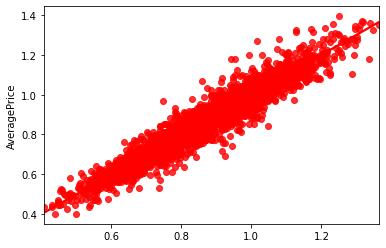

In [153]:
XGB=XGBRegressor(bootstrap=True,max_features=1,n_estimators=200)
XGB.fit(x_train,y_train)
pred=forest.predict(x_test)
print(' Mean Absolute Error (MAE) :',mean_absolute_error(pred,y_test)*100)
print('Mean Squared Error (MSE) :',mean_squared_error(pred,y_test)*100)
print('Root Mean Squared Error :',np.sqrt(mean_squared_error(pred,y_test))*100)
print('R_2 score:',r2_score(pred,y_test)*100)
## best fit line
sns.regplot(pred,y_test,color='r')

Hyperparameter tuning our R_2 score is 91.31 which is low with param tuning, we will save without hyperparameter tuning RF model.

# saving model

In [154]:
filename = "avacodo.pkl"
joblib.dump(XGB, filename)

['avacodo.pkl']

# loading and testing

In [156]:
model=joblib.load('avacodo.pkl')
prediction=model.predict(x_test)